In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###  **LOADING DATASET**

In [191]:
df = pd.read_csv("google_cleaned.csv")

###  **DATA CLEANING**

In [192]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Day
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            9145 non-null   float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
 14  Year            10840 non-null  int64  
 15  Month           10840 non-null  int64  
 16  Day             10840 non-null  int64  
dtypes: float64(3), int64(6), object

In [194]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price,Year,Month,Day
count,10840.000000,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,5419.533948,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368,2017.399723,6.422325,15.609041
std,3129.439605,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703,1.100914,2.578388,9.561621
min,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010.000000,1.000000,1.000000
25%,2709.750000,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017.000000,5.000000,6.000000
50%,5419.500000,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018.000000,7.000000,16.000000
75%,8129.250000,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,2018.000000,8.000000,24.000000
max,10840.000000,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018.000000,12.000000,31.000000


**The dataset contains incorrect data types in the following columns:**

- **`Reviews`: Often stored as a string due to the presence of non-numeric characters, but it should be an integer.**
- **`Installs`: Typically includes commas or '+' signs, causing it to be read as a string instead of an integer.**
- **`Price`: May include currency symbols like `$`, which prevents it from being stored as a proper float.**


In [195]:
df["Reviews"] = df["Reviews"].astype(int)

In [196]:
df["Installs"] = df["Installs"].astype(int)

In [197]:
df["Price"] = df["Price"].astype(int)

----

In [198]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Year                 0
Month                0
Day                  0
dtype: int64

**The dataset also has missing values in several columns:**

- **`Rating`: Missing where apps have not been rated by users.**
- **`Reviews`: Blank for apps without user feedback.**
- **`Size`: Often marked as "Varies with device", leading to missing or inconsistent values.**
- **`Type`: Some entries may be missing, especially for free/paid classification.**
- **`Current Ver` and `Android Ver`: Can be incomplete or vague, particularly when marked as "Varies with device".**


In [199]:
df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [200]:
df["Size"].fillna(df["Size"].median(),inplace=True)

In [201]:
df.dropna(subset=["Type","Current Ver","Android Ver"],inplace=True)

In [202]:
df.duplicated().sum()

np.int64(0)

In [203]:
df.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
Month             0
Day               0
dtype: int64

In [204]:
df.shape

(10829, 17)

In [205]:
df.drop(columns=["Unnamed: 0","Last Updated"],inplace=True)

---

###  **EXPLORATORY DATA ANALYIS**

In [206]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,6,20


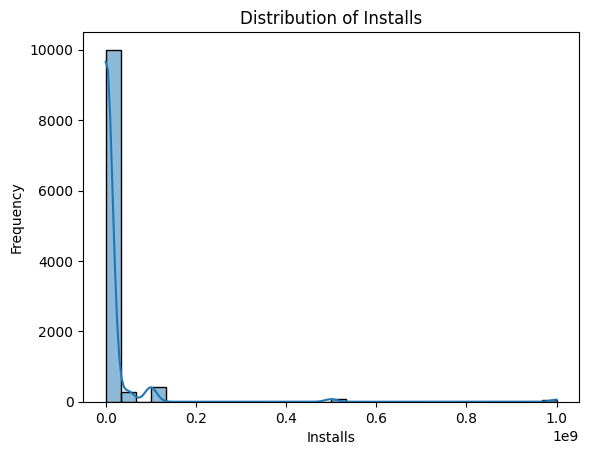

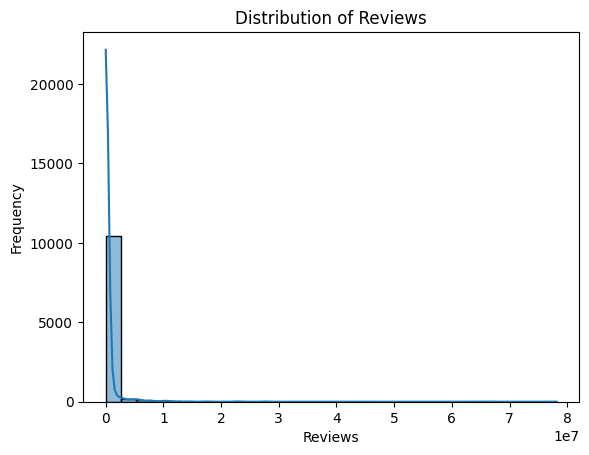

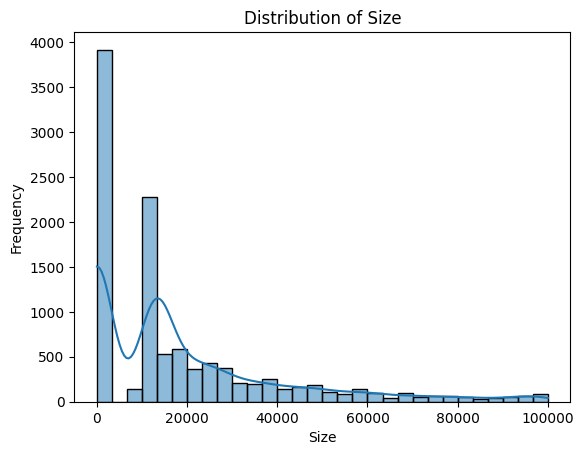

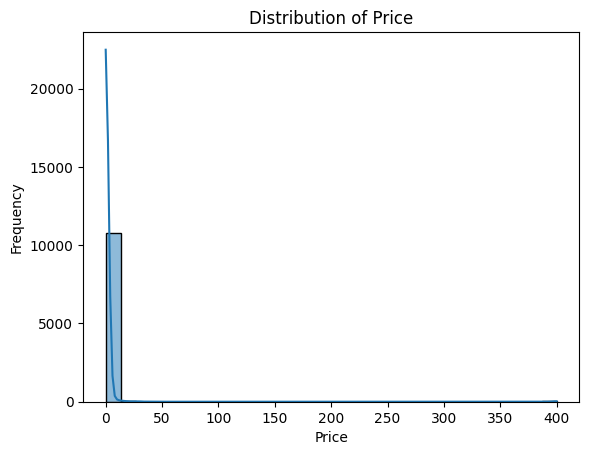

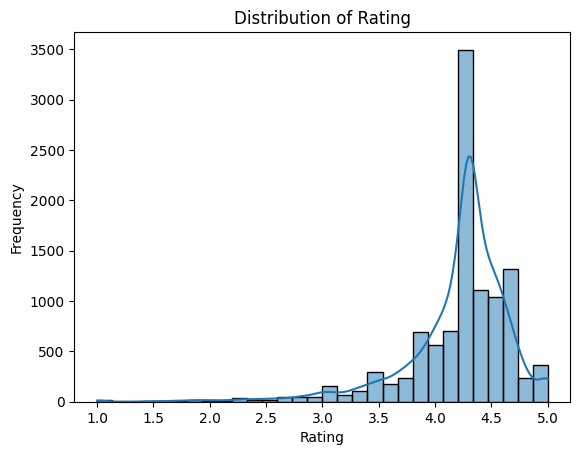

In [207]:
hist_numerical_cols = ["Installs", "Reviews", "Size", "Price", "Rating"]

for col in hist_numerical_cols:
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


---

### **Univariate Categorical Analysis**

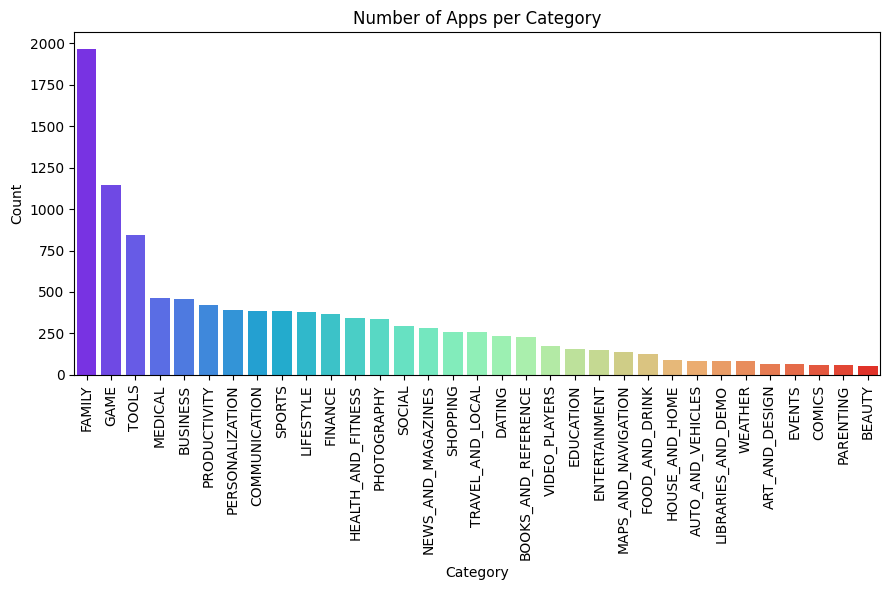

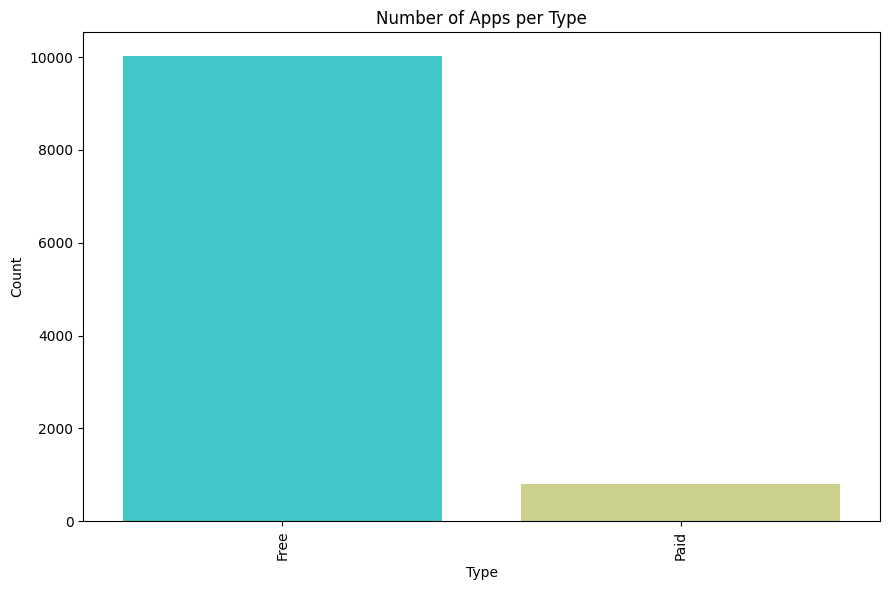

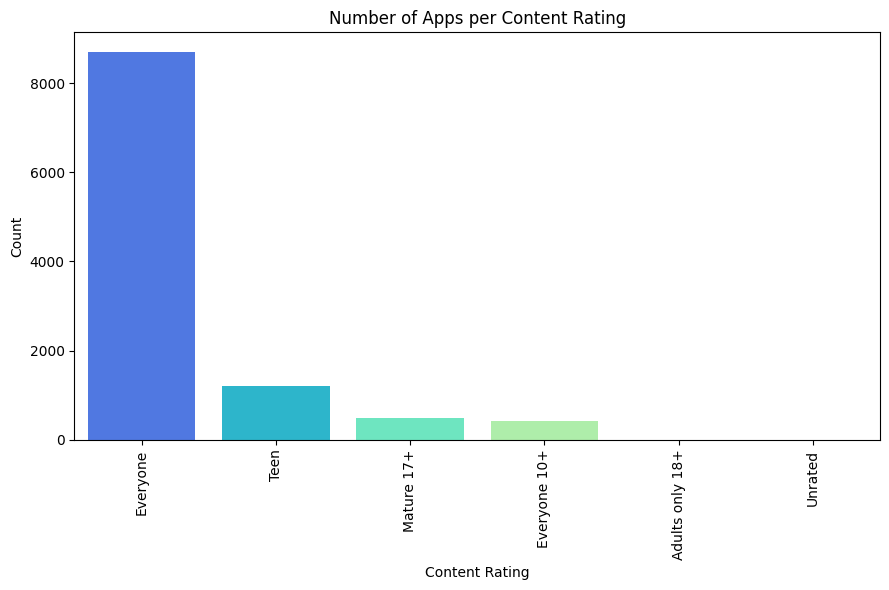

In [208]:
categorical_cols = ["Category", "Type", "Content Rating"]

for col in categorical_cols:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="rainbow")
    plt.title(f"Number of Apps per {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


### **Bivariate Analysis**

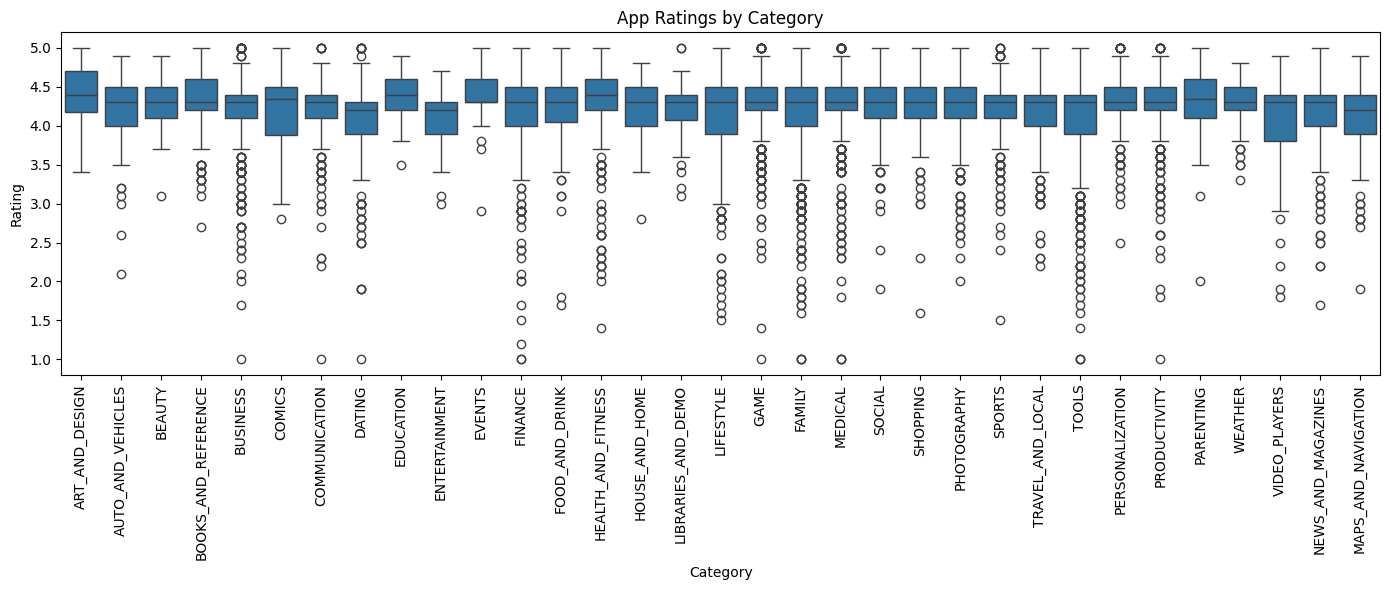

In [209]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Category", y="Rating")
plt.title("App Ratings by Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


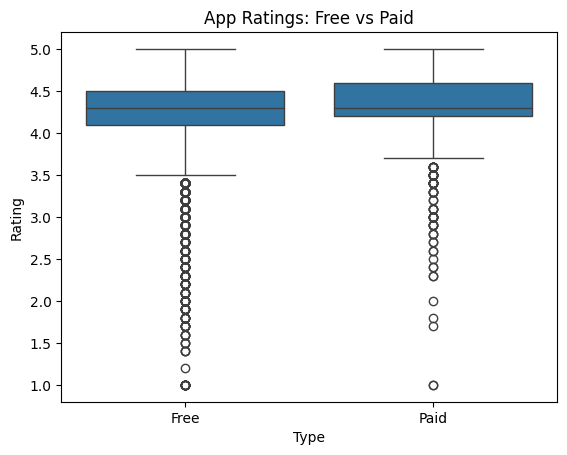

In [210]:
sns.boxplot(data=df, x="Type", y="Rating")
plt.title("App Ratings: Free vs Paid")
plt.show()


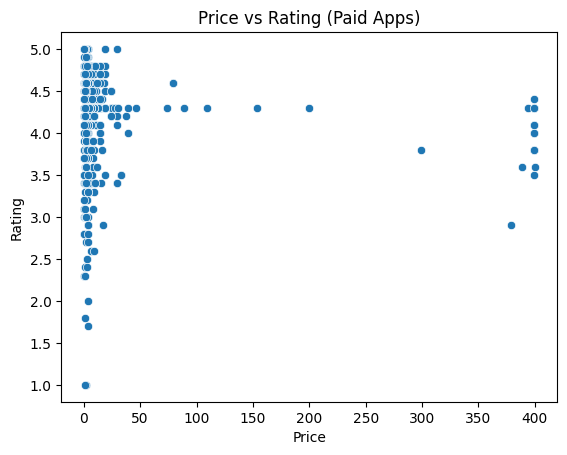

In [211]:
paid_apps = df[df["Type"] == "Paid"]
sns.scatterplot(data=paid_apps, x="Price", y="Rating")
plt.title("Price vs Rating (Paid Apps)")
plt.show()


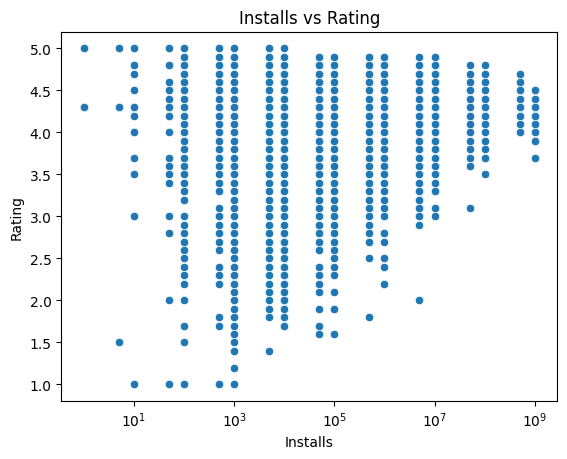

In [212]:
sns.scatterplot(data=df, x="Installs", y="Rating")
plt.title("Installs vs Rating")
plt.xscale('log') 
plt.show()


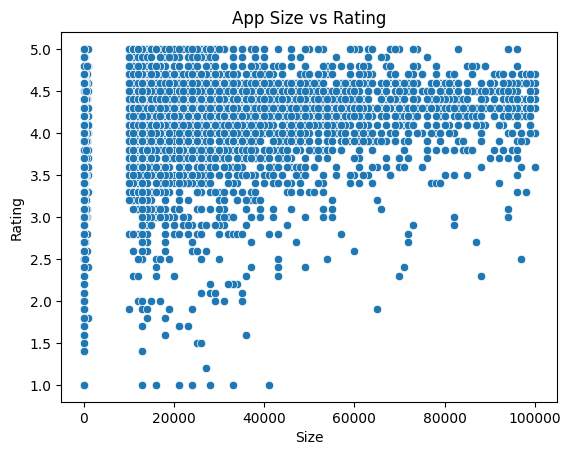

In [213]:
sns.scatterplot(data=df, x="Size", y="Rating")
plt.title("App Size vs Rating")
plt.show()


### **3. Multivariate Analysis**

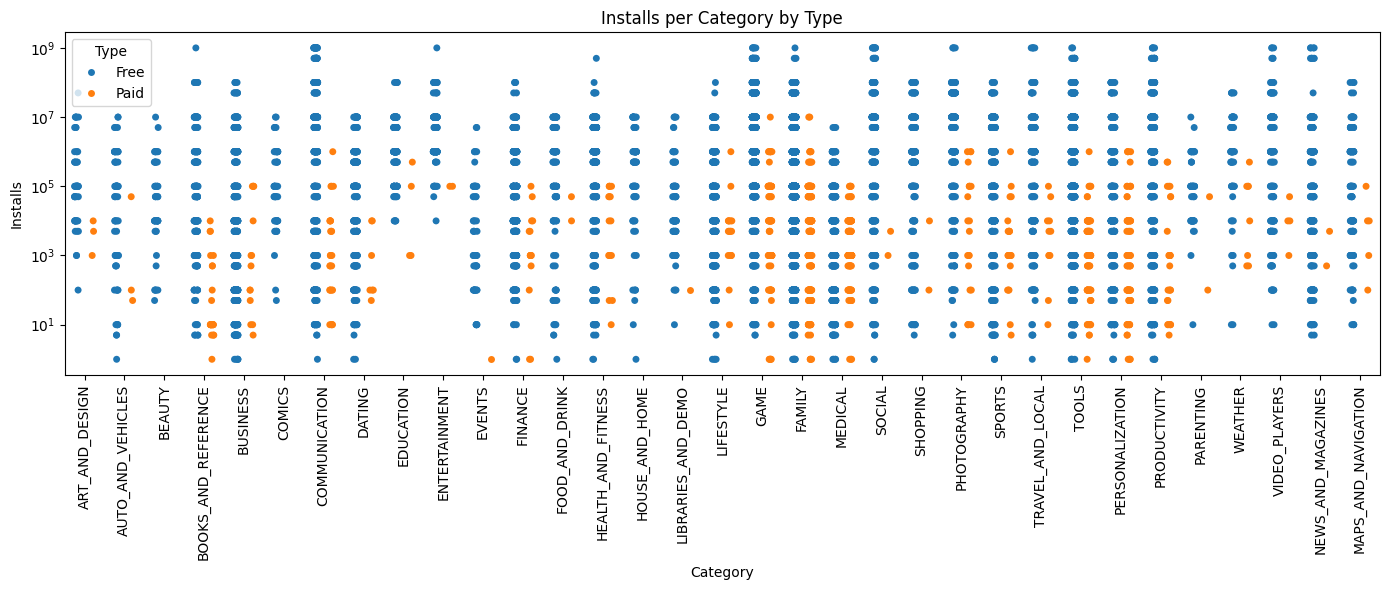

In [214]:
plt.figure(figsize=(14, 6))
sns.stripplot(data=df, x="Category", y="Installs", hue="Type", dodge=True)
plt.title("Installs per Category by Type")
plt.xticks(rotation=90)
plt.yscale('log')  
plt.tight_layout()
plt.show()


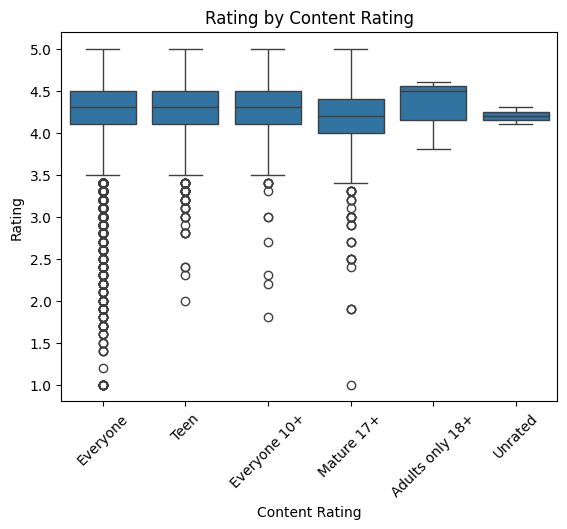

In [215]:
sns.boxplot(data=df, x="Content Rating", y="Rating")
plt.title("Rating by Content Rating")
plt.xticks(rotation=45)
plt.show()


### **4. Time-Based Analysis**

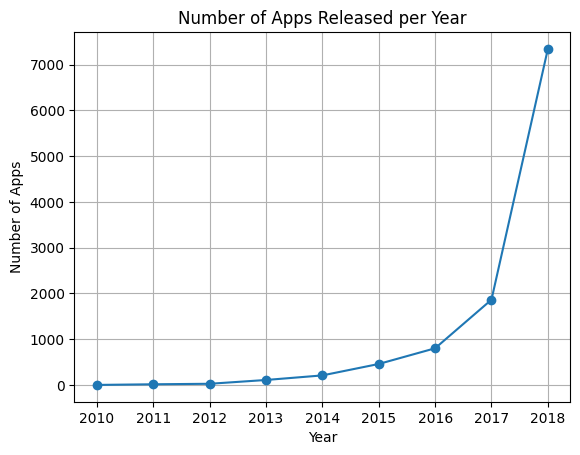

In [216]:
apps_per_year = df["Year"].value_counts().sort_index()
apps_per_year.plot(kind="line", marker='o')
plt.title("Number of Apps Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Apps")
plt.grid(True)
plt.show()


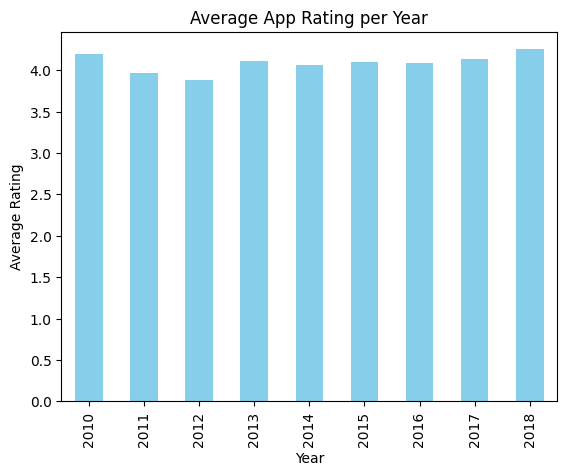

In [217]:
avg_rating_year = df.groupby("Year")["Rating"].mean()
avg_rating_year.plot(kind="bar", color='skyblue')
plt.title("Average App Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


---

### **Encoding**